In [1]:
!gdown 1dx2Hw8873hJ1nZIgnDxwjqXezYUb3jSP

Downloading...
From: https://drive.google.com/uc?id=1dx2Hw8873hJ1nZIgnDxwjqXezYUb3jSP
To: /content/DJIA_table.csv
100% 167k/167k [00:00<00:00, 9.04MB/s]


In [2]:
!gdown 12oMFU-mFRbndrHRAWhsW6vNqTHIaSjY7

Downloading...
From: https://drive.google.com/uc?id=12oMFU-mFRbndrHRAWhsW6vNqTHIaSjY7
To: /content/RedditNews.csv
100% 9.10M/9.10M [00:00<00:00, 47.7MB/s]


In [3]:
import pandas as pd

In [4]:
data_djia = pd.read_csv('DJIA_table.csv')

In [5]:
data_reddit = pd.read_csv('RedditNews.csv')

In [6]:
data_reddit = data_reddit.groupby('Date').agg({'News':' '.join}).reset_index()

In [7]:
data = pd.merge(data_djia, data_reddit, on='Date')

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.sort_index()

In [9]:
col_features = data.drop(columns='News').columns

In [10]:
lag = 5
for i in range(1, lag+1):
  for col in col_features:
    data[f'{col}_prev_{i}'] = data[col].shift(i)

In [11]:
data['NewsPrev'] = data['News'].shift(1)

In [12]:
data.head(3)

,Open,High,Low,Close,Volume,Adj Close,News,Open_prev_1,High_prev_1,Low_prev_1,...,Close_prev_4,Volume_prev_4,Adj Close_prev_4,Open_prev_5,High_prev_5,Low_prev_5,Close_prev_5,Volume_prev_5,Adj Close_prev_5,NewsPrev
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,"b""Georgia 'downs two Russian warplanes' as cou...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,b'Why wont America and Nato help us? If they w...,11432.089844,11759.959961,11388.040039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"b""Georgia 'downs two Russian warplanes' as cou..."
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,b'Remember that adorable 9-year-old who sang a...,11729.669922,11867.110352,11675.530273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'Why wont America and Nato help us? If they w...


In [13]:
data = data.dropna(axis=0)

In [14]:
data['num_words'] = data['NewsPrev'].apply(lambda x: len(x.split(" ")))

<ipython-input-14-803859bb11c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['NewsPrev'].apply(lambda x: len(x.split(" ")))


<Axes: ylabel='Frequency'>

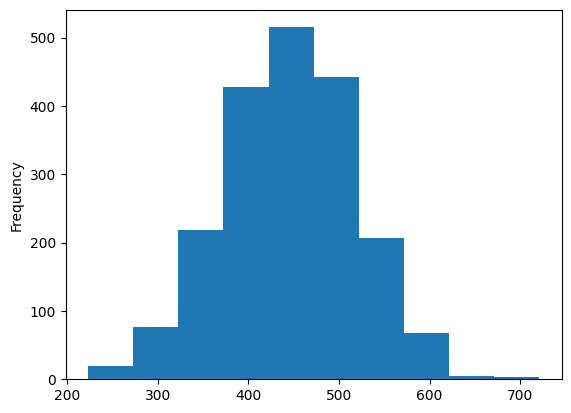

In [15]:
data['num_words'].plot.hist()

In [16]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
vocabulary = 600

In [18]:
data = data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close', 'News', 'num_words'])

In [19]:
features = list(data.drop(columns=['Close']).columns)
features

['Open_prev_1',
 'High_prev_1',
 'Low_prev_1',
 'Close_prev_1',
 'Volume_prev_1',
 'Adj Close_prev_1',
 'Open_prev_2',
 'High_prev_2',
 'Low_prev_2',
 'Close_prev_2',
 'Volume_prev_2',
 'Adj Close_prev_2',
 'Open_prev_3',
 'High_prev_3',
 'Low_prev_3',
 'Close_prev_3',
 'Volume_prev_3',
 'Adj Close_prev_3',
 'Open_prev_4',
 'High_prev_4',
 'Low_prev_4',
 'Close_prev_4',
 'Volume_prev_4',
 'Adj Close_prev_4',
 'Open_prev_5',
 'High_prev_5',
 'Low_prev_5',
 'Close_prev_5',
 'Volume_prev_5',
 'Adj Close_prev_5',
 'NewsPrev']

In [20]:
x, y = data[features], data['Close']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [22]:
tokenizer = Tokenizer(num_words=vocabulary)
tokenizer.fit_on_texts(x_train['NewsPrev'].values)
x_train['NewsPrev'] = tokenizer.texts_to_sequences(x_train['NewsPrev'])
x_test['NewsPrev'] = tokenizer.texts_to_sequences(x_test['NewsPrev'])

(array([ 15.,  49., 143., 317., 434., 343., 212.,  56.,  14.,   4.]),
 array([107. , 140.3, 173.6, 206.9, 240.2, 273.5, 306.8, 340.1, 373.4,
        406.7, 440. ]),
 <BarContainer object of 10 artists>)

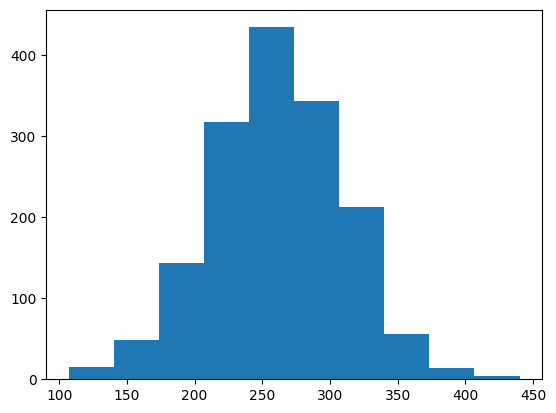

In [23]:
len_tokens = [len(token_list) for token_list in x_train['NewsPrev']]
plt.hist(len_tokens)

In [24]:
max_token_length = 380

In [25]:
news_train = sequence.pad_sequences(x_train['NewsPrev'], maxlen=max_token_length)
news_test = sequence.pad_sequences(x_test['NewsPrev'], maxlen=max_token_length)

In [26]:
nums_train = x_train.drop(columns=['NewsPrev'])
nums_test = x_test.drop(columns=['NewsPrev'])

In [27]:
nums_train.head(3)

,Open_prev_1,High_prev_1,Low_prev_1,Close_prev_1,Volume_prev_1,Adj Close_prev_1,Open_prev_2,High_prev_2,Low_prev_2,Close_prev_2,...,Low_prev_4,Close_prev_4,Volume_prev_4,Adj Close_prev_4,Open_prev_5,High_prev_5,Low_prev_5,Close_prev_5,Volume_prev_5,Adj Close_prev_5
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-15,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,11632.809570,11633.780273,11453.339844,11532.959961,...,11675.530273,11782.349609,183190000.0,11782.349609,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312
2008-08-18,11611.209961,11709.889648,11599.730469,11659.900391,215040000.0,11659.900391,11532.070312,11718.280273,11450.889648,11615.929688,...,11601.519531,11642.469727,173590000.0,11642.469727,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609
2008-08-19,11659.650391,11690.429688,11434.120117,11479.389648,156290000.0,11479.389648,11611.209961,11709.889648,11599.730469,11659.900391,...,11453.339844,11532.959961,182550000.0,11532.959961,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(nums_train)
nums_train = scaler.transform(nums_train)
nums_test = scaler.transform(nums_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

In [29]:
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, concatenate

In [30]:
nums_train.shape

(1587, 30)

In [31]:
nums_train = nums_train.reshape(nums_train.shape[0], lag, nums_train.shape[1] // lag)
nums_test = nums_test.reshape(nums_test.shape[0], lag, nums_test.shape[1] // lag)

In [32]:
nums_train.shape

(1587, 5, 6)

In [33]:
text_input = Input(shape=(max_token_length,))
embedding = Embedding(vocabulary, 64)(text_input)
text_output = LSTM(64)(embedding)

num_input = Input(shape=(lag,nums_train.shape[2]))
lstm_first = LSTM(128,  activation='relu', input_shape=(lag, nums_train.shape[2]), return_sequences=True)(num_input)
lstm_output = LSTM(64,  activation='relu')(lstm_first)

concatenated = concatenate([text_output, lstm_output])

dense1 = Dense(32, activation='relu')(concatenated)
dense2 = Dense(8, activation='relu')(dense1)

output = Dense(1, activation='linear')(dense2)

model = Model(inputs=[text_input, num_input], outputs=output)

In [34]:
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

In [35]:
history = model.fit([news_train, nums_train], y_train, validation_split=0.2, batch_size=12, epochs=20, shuffle=False)

Epoch 1/20
106/106 [==============================] - 30s 180ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0609 - val_loss: 0.0113 - val_mean_squared_error: 0.0113 - val_mean_absolute_error: 0.1003
Epoch 2/20
106/106 [==============================] - 19s 178ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - mean_absolute_error: 0.0791 - val_loss: 0.0041 - val_mean_squared_error: 0.0041 - val_mean_absolute_error: 0.0559
Epoch 3/20
106/106 [==============================] - 18s 171ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - mean_absolute_error: 0.0822 - val_loss: 0.0024 - val_mean_squared_error: 0.0024 - val_mean_absolute_error: 0.0391
Epoch 4/20
106/106 [==============================] - 19s 175ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - mean_absolute_error: 0.0860 - val_loss: 0.0137 - val_mean_squared_error: 0.0137 - val_mean_absolute_error: 0.1028
Epoch 5/20
106/106 [==============================] - 18s 171ms/step - loss: 0.0108 

In [36]:
preds = model.predict([news_test, nums_test])
preds = scaler.inverse_transform(preds)

13/13 [==============================] - 2s 81ms/step


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(preds, y_test.values.reshape(-1,1)), mean_absolute_error(preds, y_test.values.reshape(-1,1)), r2_score(preds, y_test.values.reshape(-1,1))

(595479.5003247685, 687.8515551144521, 0.24957966075879168)

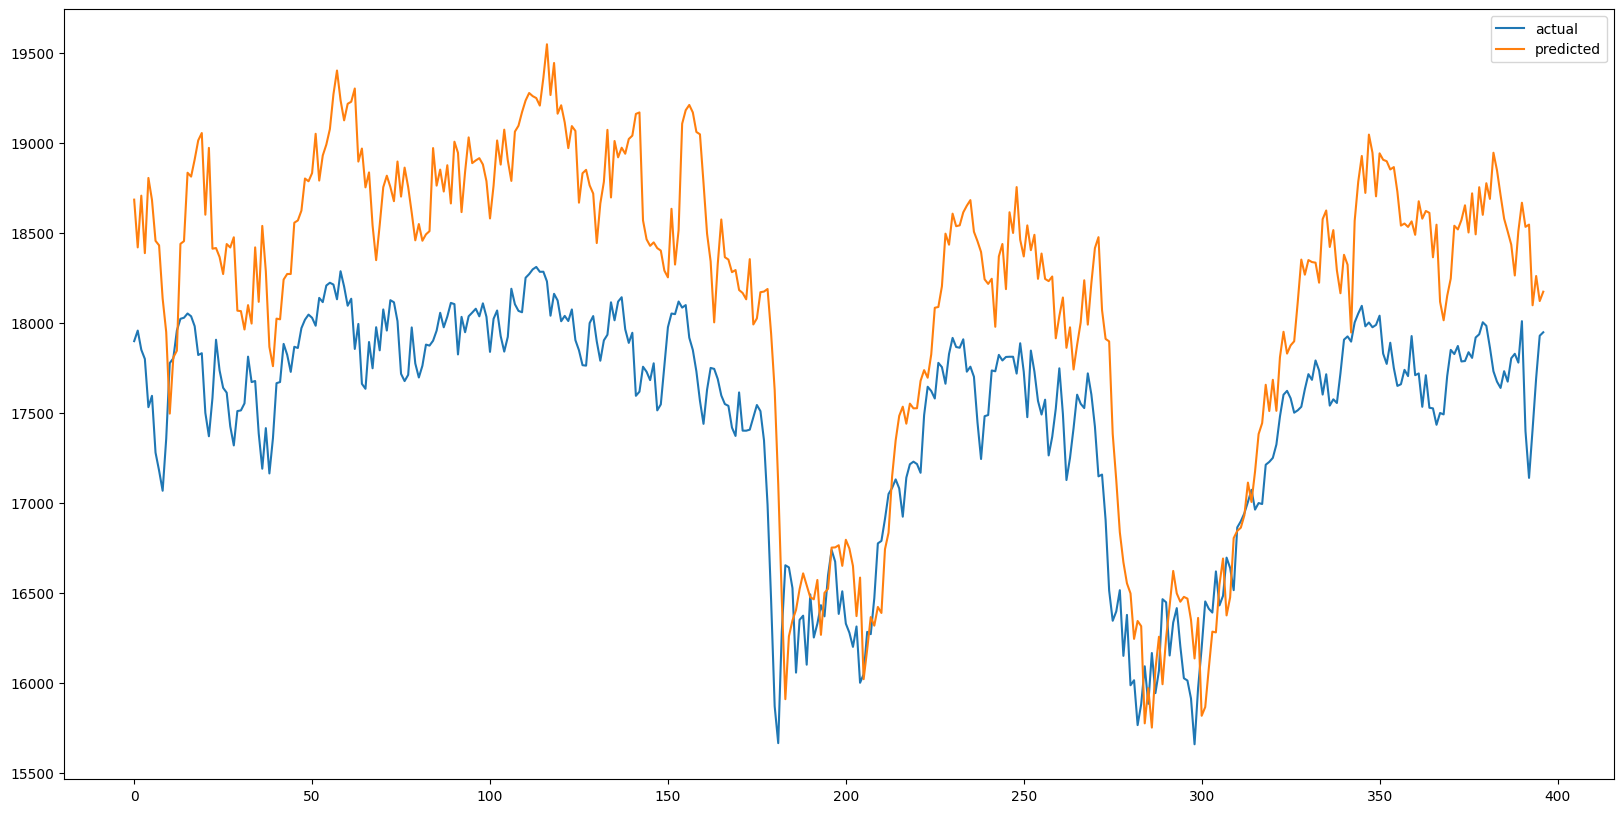

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(y_test.values.reshape(-1,1), label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()